In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 데이터셋 Load

In [8]:
#데이터 호출
df = pd.read_csv('data\product_inventory_A.csv', index_col=0)
df

,제품,생산량,출고량,현재고량
생산일자,,,,
2018-01-02,A,0,4000,29650
2018-01-03,A,0,6000,23650
2018-01-04,A,0,6000,17650
2018-01-05,A,0,5000,12650
2018-01-08,A,42000,6000,48650
...,...,...,...,...
2019-11-08,A,0,8000,128550
2019-11-11,A,0,15000,113550
2019-11-12,A,43300,11000,145850


# 휴일에 대한 데이터 보간

In [9]:
#휴일 유무에 따른 예측값의 변화를 확인할 때 사용할 데이터셋을 위해 타임스탬프 준비
#데이터에서 빈 요일을 보간할 때 사용
import datetime
firstTime = pd.Timestamp(2018, 1, 1,0,0,0)
curTime = firstTime
lastTime = pd.Timestamp(2019, 10, 18,0,0,0) # 2019-10-18,B,0,4000,165100
allTimeStamp = [curTime]
while True:
  curTime = curTime + datetime.timedelta(days=1)
  allTimeStamp.append(curTime)
  if curTime == lastTime:
    break

In [10]:
#데이터셋을 보간하여 allday라는 데이터프레임으로 저장
allday = pd.DataFrame(columns = ['생산일자','제품','생산량','출고량','현재고량'])
allday.loc[0] = [firstTime,'A',0,0,33650]
a = list(df.index)
for i in range(1,len(allTimeStamp)):
  if allTimeStamp[i] in a:
    last = df.loc[allTimeStamp[i]]
    allday.loc[len(allday)] = [allTimeStamp[i],'A',last['생산량'],last['출고량'],last['현재고량']]
  else:
    last = allday.loc[i-1]
    allday.loc[len(allday)] = [allTimeStamp[i],'A',0,0,last['현재고량']]

In [11]:
allday.set_index('생산일자', inplace=True)

# 데이터 EDA 및 데이터에 대한 컴포넌트 분석

In [14]:
df1 = df[['생산량']]
df2 = df[['출고량']]
df3 = df[['현재고량']]

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

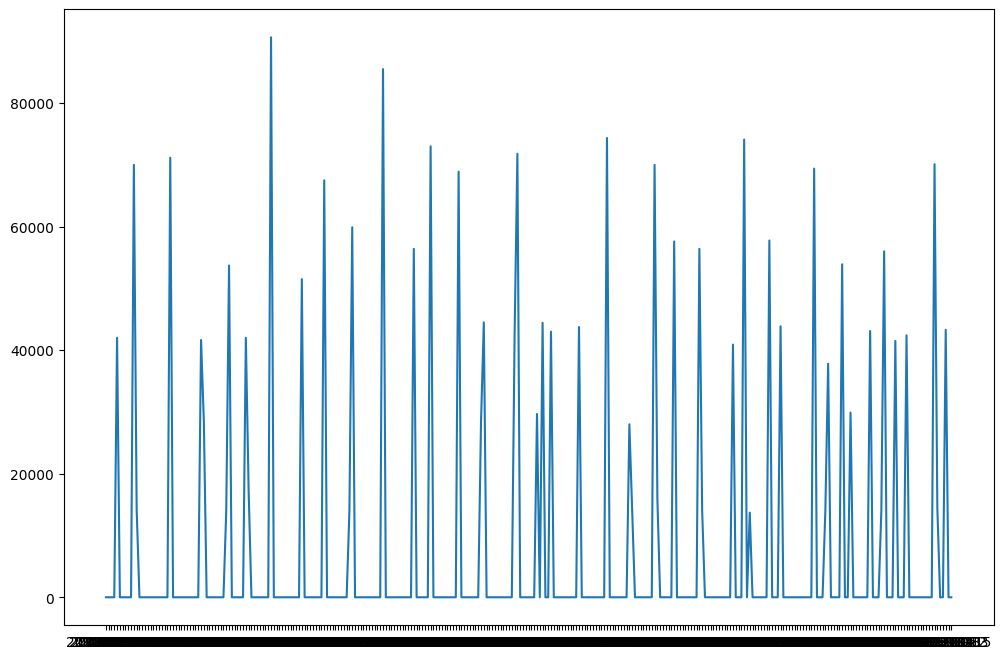

In [15]:
#생산량 데이터 모양 확인
plt.figure(figsize= (12,8))
plt.plot(df1)

In [ ]:
#출고량 데이터 모양 확인
plt.figure(figsize= (12,8))
plt.plot(df2)

In [ ]:
#현재고량 데이터 모양 확인
plt.figure(figsize= (12,8))
plt.plot(df3)

# 2. 데이터 정상성 확인

In [16]:
#생산량 시계열 분해 
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(df1, model='additive', period=240)
fig = dec.plot()
fig.set_size_inches(9, 5)

AttributeError: module 'numpy.linalg._umath_linalg' has no attribute '_ilp64'

In [ ]:
#출고량 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(df2, model='additive', period=240)
fig = dec.plot()
fig.set_size_inches(9, 5)

In [ ]:
#현재고량 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(df3, model='additive', period=240)
fig = dec.plot()
fig.set_size_inches(9, 5)

In [ ]:
from statsmodels.tsa.stattools import adfuller

## ADF Test

In [ ]:
target_df = df2

In [ ]:
#ADF 테스트
adfuller(target_df)

# 3. 비정상적인 데이터를 정상 데이터로 변환

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #ACF, PACF 그래프

In [ ]:
#ACF, PACF 그래프
plot_acf(target_df)
plot_pacf(target_df)
plt.show()

In [ ]:
#훈련, 실험 데이터 분리
train_df, test_df = train_test_split(target_df, test_size = 0.2, shuffle = False)

In [ ]:
# 차분 데이터 저장
diff_train_df = train_df.diff().dropna()
diff_test_df = test_df.diff().dropna()

In [ ]:
# 시각화
plt.figure(figsize= (12,8))
plt.subplot(311)
plt.plot(train_df)
plt.legend('Raw Data')
plt.subplot(312)
plt.plot(diff_train_df, 'orange')
plt.legend('Differenced Data')
plt.show()

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8,8))
plot_acf(df['출고량'].diff().dropna(), ax[0])
plot_pacf(df['출고량'].diff().dropna(), ax[1])
plt.show()

## Differencing